In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
import cv2
import matplotlib.pyplot as plt
from gtts import gTTS
import os
import playsound


In [3]:
from searchtype import choice, uniform, loguniform
from model_PSO import model

ModuleNotFoundError: No module named 'searchtype'

In [2]:
model = Sequential()

## Declare the layers
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 49s 26ms/step - loss: 0.8097 - accuracy: 0.7874 - val_loss: 0.1093 - val_accuracy: 0.9662
Epoch 2/3
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2684 - accuracy: 0.9206 - val_loss: 0.0789 - val_accuracy: 0.9768
Epoch 3/3
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2079 - accuracy: 0.9382 - val_loss: 0.0601 - val_accuracy: 0.9800





----------------Contoured Image--------------------


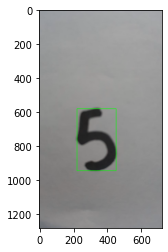



---------------------------------------


=========PREDICTION============ 




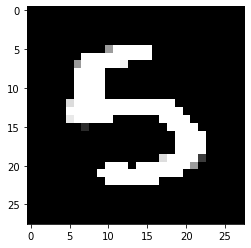



Final Output: 5

Prediction (Softmax) from the neural network:

 [[6.5953722e-09 1.8730073e-08 9.8027619e-12 1.0011175e-04 1.0634792e-11
  9.9989820e-01 6.9287404e-07 6.3010527e-11 8.5849899e-07 1.7271557e-07]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




In [3]:
image = cv2.imread('./5.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours,_= cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x,y,w,h = cv2.boundingRect(c)

    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

    digit = thresh[y:y+h, x:x+w]

    resized_digit = cv2.resize(digit, (18,18))

    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()

inp = np.array(preprocessed_digits)
final_output = 0
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))   
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    final_output = np.argmax(prediction)
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")

5

In [8]:
obj = gTTS(text=str(final_output), lang='en', slow = False)
obj.save("speech.mp3")
playsound.playsound('./speech.mp3', True)
os.remove("./speech.mp3")